In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.python.keras import regularizers
from hmmlearn.hmm import GaussianHMM
from hmmlearn import hmm
import numpy as np

In [2]:
train_data='/Users/harisha/Documents/Northeastern/CS5100/AI project/images/train'
test_data='/Users/harisha/Documents/Northeastern/CS5100/AI project/images/validation'

In [3]:
picture_size = 48
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_data,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(test_data,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1 Pro


2023-04-25 16:14:00.905486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-25 16:14:00.905516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/Users/harisha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


/var/folders/0z/pypx7vns6kx13d8r7x792pr80000gn/T/ipykernel_72415/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,
2023-04-25 16:14:01.307277: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-25 16:14:01.934396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 1.7834 - accuracy: 0.3028

2023-04-25 16:14:26.373843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 27s 114ms/step - loss: 1.7834 - accuracy: 0.3028 - val_loss: 2.0464 - val_accuracy: 0.2562 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 25s 110ms/step - loss: 1.4548 - accuracy: 0.4350 - val_loss: 1.5013 - val_accuracy: 0.4324 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 25s 111ms/step - loss: 1.2959 - accuracy: 0.5012 - val_loss: 1.3402 - val_accuracy: 0.4879 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 25s 109ms/step - loss: 1.2078 - accuracy: 0.5386 - val_loss: 1.3210 - val_accuracy: 0.4821 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 25s 109ms/step - loss: 1.1333 - accuracy: 0.5705 - val_loss: 1.3004 - val_accuracy: 0.4994 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 25s 109ms/step - loss: 1.0765 - accuracy: 0.5904 - val_loss: 1.1806 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 25s 109ms

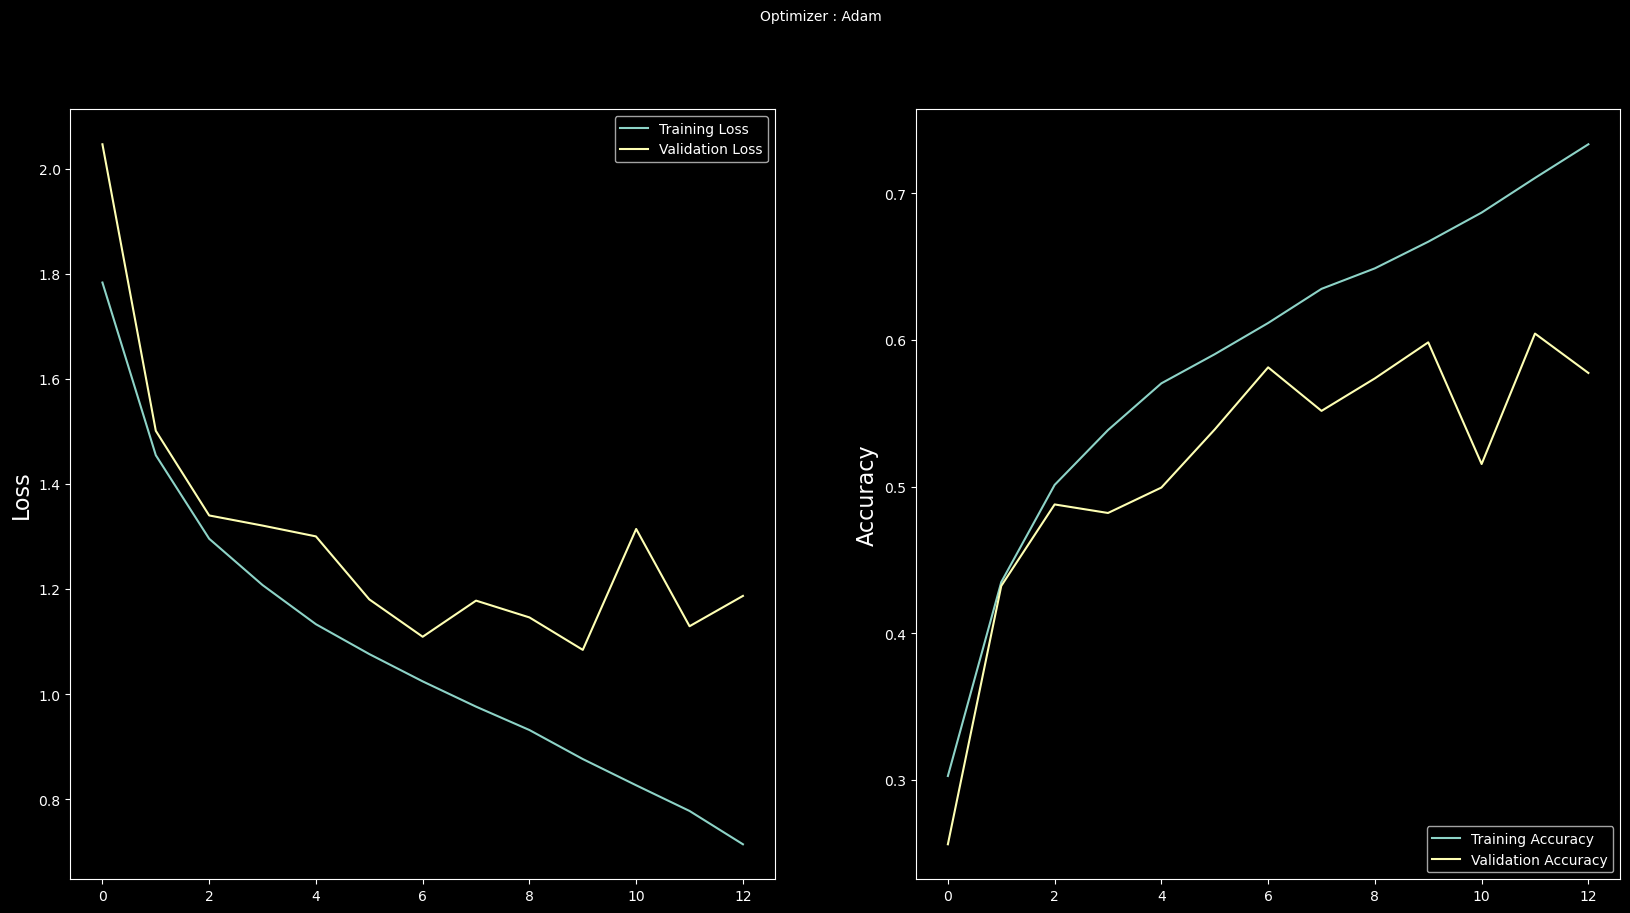

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [49]:
train_features = model.predict(train_set)
validation_features = model.predict(test_set)

56/56 [==============================] - 2s 28ms/step


In [17]:
train_features = np.reshape(train_features, (train_features.shape[0], -1))
validation_features = np.reshape(validation_features, (validation_features.shape[0], -1))

In [18]:
n_states = 7 # number of states in the HMM
model_hmm = hmm.GaussianHMM(n_components=n_states)

# train the HMM on the training features
model_hmm.fit(train_features)

# evaluate the HMM on the validation features
log_likelihoods = model_hmm.score(validation_features)

/Users/harisha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


225145.238204868


In [19]:
model_hmm = hmm.GaussianHMM(n_components=n_states)
model_hmm.fit(train_features)

/Users/harisha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(n_components=7)

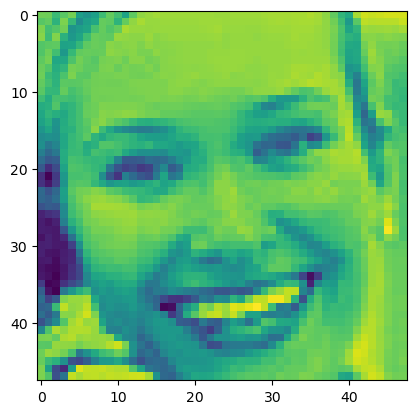

In [38]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
path="/Users/harisha/Documents/Northeastern/CS5100/AI project/images/validation/happy/80.jpg"
img = load_img(path,target_size=(48,48),color_mode = "grayscale")
img=img_to_array(img)
plt.imshow(img)
img = img.reshape(1,48,48,1)

In [44]:
# Use the HMM to predict emotions from new images
test_features = model.predict(img)
test_features = np.reshape(test_features, (test_features.shape[0], -1))
log_likelihoods = model_hmm.score(test_features)

1/1 [==============================] - 0s 68ms/step


In [45]:
# Map the log-likelihoods to emotion labels using maximum likelihood
emotions = ['happiness', 'sadness', 'anger', 'fear', 'disgust', 'surprise', 'neutral']
predicted_label_index = np.argmax(log_likelihoods)
predicted_emotion = emotions[predicted_label_index]

print("Predicted emotion: ", predicted_emotion)

Predicted emotion:  happiness
